In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=c338e377546d0b6908931ae7c5bf0dd6d610284f0f1aab01ac0add7b57c67a1e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, col
import matplotlib.pyplot as plt
import seaborn as sns

Création de l'environnement de travail "Cas d'usage DVF" :

In [ ]:
SparkDVF=SparkSession.builder.appName("Cas d'usage DVF").config("spark.master","local[4]").getOrCreate()
SparkDVF.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [ ]:
#Lecture des bases de données sur Spark et division des bases de données en parties en utilisant write.parquet

#Data2019=SparkDVF.read.csv("/content/drive/MyDrive/ECC_202311/Datalake/01_RawData/valeursfoncieres-2019.txt",header=True,sep="|")
#Data2019.write.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2019.parquet")
#Data2020=SparkDVF.read.csv("/content/drive/MyDrive/ECC_202311/Datalake/01_RawData/valeursfoncieres-2020.txt",header=True,sep="|")
#Data2020.write.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2020.parquet")
#Data2021=SparkDVF.read.csv("/content/drive/MyDrive/ECC_202311/Datalake/01_RawData/valeursfoncieres-2021.txt",header=True,sep="|")
#Data2021.write.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2021.parquet")
#Data2022=SparkDVF.read.csv("/content/drive/MyDrive/ECC_202311/Datalake/01_RawData/valeursfoncieres-2022.txt",header=True,sep="|")
#Data2022.write.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2022.parquet")

In [ ]:
#Lecture des bases de données sur Spark en format parquets
Data2019=SparkDVF.read.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2019.parquet")
Data2020=SparkDVF.read.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2020.parquet")
Data2021=SparkDVF.read.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2021.parquet")
Data2022=SparkDVF.read.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/DVF_2022.parquet")

In [ ]:
#Nombre de ventes pour chaque année
print("Nombre de ventes en 2019 :", Data2019.count())
print("Nombre de ventes en 2020 :", Data2020.count())
print("Nombre de ventes en 2021 :", Data2021.count())
print("Nombre de ventes en 2022 :", Data2022.count())

Nombre de ventes en 2019 : 3627130
Nombre de ventes en 2020 : 3518587
Nombre de ventes en 2021 : 4663026
Nombre de ventes en 2022 : 4617590


In [ ]:
#Création des tableaux pour chaque année
Data2019.createOrReplaceTempView("TableDVF2019")
Data2020.createOrReplaceTempView("TableDVF2020")
Data2021.createOrReplaceTempView("TableDVF2021")
Data2022.createOrReplaceTempView("TableDVF2022")

In [ ]:
#Lecture de toutes les bases de données sur un fichier et conversion vers parquet
#MyGlobalDB=SparkDVF.read.csv("/content/drive/MyDrive/ECC_202311/Datalake/01_RawData/valeursfoncieres-*.txt",header=True,sep="|")
# MyGlobalDB=MyGlobalDB.write.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/NewGlobalDCF.parquet")

In [ ]:
#Lecture du fichier parquet créée précedement
MyGlobalDB=SparkDVF.read.parquet("/content/drive/MyDrive/ECC_202311/Datalake/02_FormatChange/NewGlobalDCF.parquet")

In [ ]:
#Création d'un tableau pour toutes les années
MyGlobalDB=MyGlobalDB.withColumn('Valeur fonciere',regexp_replace('Valeur fonciere',',','.'))
MyGlobalDB.createOrReplaceTempView("GlobalDB")

In [ ]:
print("Nombre de ventes totale :",MyGlobalDB.count())

Nombre de ventes totale : 16426333


In [ ]:
MyGlobalDB.printSchema()

root
 |-- Identifiant de document: string (nullable = true)
 |-- Reference document: string (nullable = true)
 |-- 1 Articles CGI: string (nullable = true)
 |-- 2 Articles CGI: string (nullable = true)
 |-- 3 Articles CGI: string (nullable = true)
 |-- 4 Articles CGI: string (nullable = true)
 |-- 5 Articles CGI: string (nullable = true)
 |-- No disposition: string (nullable = true)
 |-- Date mutation: string (nullable = true)
 |-- Nature mutation: string (nullable = true)
 |-- Valeur fonciere: string (nullable = true)
 |-- No voie: string (nullable = true)
 |-- B/T/Q: string (nullable = true)
 |-- Type de voie: string (nullable = true)
 |-- Code voie: string (nullable = true)
 |-- Voie: string (nullable = true)
 |-- Code postal: string (nullable = true)
 |-- Commune: string (nullable = true)
 |-- Code departement: string (nullable = true)
 |-- Code commune: string (nullable = true)
 |-- Prefixe de section: string (nullable = true)
 |-- Section: string (nullable = true)
 |-- No plan: s

<h1>01. Variation du Nombre de Ventes par Départements et par An (2019-2022)</h1>

In [ ]:
#Distribution de nombre de ventes par départements en 2019
print("Echantillon de top nombre de ventes par départements en 2019 :")
SparkDVF.sql("""
SELECT
    `Code departement`,
    COUNT(*) as NbVentes
FROM
    TableDVF2019
GROUP BY
    `Code departement`
ORDER BY
    NbVentes DESC
""").show()
#Distribution de nombre de ventes par départements en 2020
print("Echantillon de top nombre de ventes par départements en 2020 :")
SparkDVF.sql("""
SELECT
    `Code departement`,
    COUNT(*) as NbVentes
FROM
    TableDVF2020
GROUP BY
    `Code departement`
ORDER BY
    NbVentes DESC
""").show()
#Distribution de nombre de ventes par départements en 2021
print("Echantillon de top nombre de ventes par départements en 2021 :")
SparkDVF.sql("""
SELECT
    `Code departement`,
    COUNT(*) as NbVentes
FROM
    TableDVF2021
GROUP BY
    `Code departement`
ORDER BY
    NbVentes DESC
""").show()
#Distribution de nombre de ventes par départements en 2022
print("Echantillon de top nombre de ventes par départements en 2022 :")
SparkDVF.sql("""
SELECT
    `Code departement`,
    COUNT(*) as NbVentes
FROM
    TableDVF2022
GROUP BY
    `Code departement`
ORDER BY
    NbVentes DESC
""").show()

Echantillon de top nombre de ventes par départements en 2019 :
+----------------+--------+
|Code departement|NbVentes|
+----------------+--------+
|              33|  100994|
|              59|   96312|
|              69|   91804|
|              44|   90810|
|              13|   85099|
|              31|   77885|
|              06|   74972|
|              34|   74423|
|              77|   73728|
|              92|   71210|
|              75|   70288|
|              38|   66699|
|              83|   66406|
|              74|   64465|
|              35|   64307|
|              78|   64039|
|              29|   61629|
|              17|   58584|
|              49|   56526|
|              93|   55324|
+----------------+--------+
only showing top 20 rows

Echantillon de top nombre de ventes par départements en 2020 :
+----------------+--------+
|Code departement|NbVentes|
+----------------+--------+
|              59|   94035|
|              33|   91936|
|              69|   84615|
|       

In [ ]:
#Meilleur 5 département pour chaque année en ce qui concerne le nombre du ventes
top5departement=SparkDVF.sql("""
SELECT
    `Code departement`,
    NbVentes,
    year
FROM
    (SELECT
        `Code departement`,
        COUNT(*) AS NbVentes,
        YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) AS year,
        ROW_NUMBER() OVER (PARTITION BY YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) ORDER BY COUNT(*) DESC) AS row_num
    FROM
        GlobalDB
    GROUP BY
        `Code departement`, YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')))
WHERE
    row_num <= 5
ORDER BY
    year,
    NbVentes DESC;
 """).show()

+----------------+--------+----+
|Code departement|NbVentes|year|
+----------------+--------+----+
|              33|  100994|2019|
|              59|   96312|2019|
|              69|   91804|2019|
|              44|   90810|2019|
|              13|   85099|2019|
|              59|   94035|2020|
|              33|   91936|2020|
|              69|   84615|2020|
|              44|   82783|2020|
|              13|   82464|2020|
|              59|  128756|2021|
|              33|  118135|2021|
|              83|  114162|2021|
|              13|  111163|2021|
|              69|  108209|2021|
|              59|  122665|2022|
|              33|  119757|2022|
|              13|  108534|2022|
|              83|  106606|2022|
|              69|  106519|2022|
+----------------+--------+----+



In [ ]:
#Calcule de nombre de départements existantes
SparkDVF.sql("select count(*) as NbrDepartements from (select distinct `Code departement` from GlobalDB )").show()


+---------------+
|NbrDepartements|
+---------------+
|             97|
+---------------+



In [ ]:
#Création d'un tableau qui contient toutes les code de departement et leurs nombre de ventes sur chaque année
data_ventes_ans=SparkDVF.sql("""SELECT
    `Code departement`,
    COUNT(*) AS NbVentes,
    YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) AS year
FROM
    GlobalDB
GROUP BY
    `Code departement`, year
  order by NbVentes desc"""
)

In [ ]:
data_ventes_ans.show()

+----------------+--------+----+
|Code departement|NbVentes|year|
+----------------+--------+----+
|              59|  128756|2021|
|              59|  122665|2022|
|              33|  119757|2022|
|              33|  118135|2021|
|              83|  114162|2021|
|              13|  111163|2021|
|              13|  108534|2022|
|              69|  108209|2021|
|              83|  106606|2022|
|              69|  106519|2022|
|              06|  106001|2022|
|              44|  103999|2021|
|              33|  100994|2019|
|              44|  100589|2022|
|              06|   99683|2021|
|              75|   97971|2022|
|              31|   97351|2021|
|              31|   97142|2022|
|              34|   96656|2022|
|              34|   96626|2021|
+----------------+--------+----+
only showing top 20 rows



In [ ]:
#Conversion de notre tableau en format pandas en utilisant la fonction toPandas() de Spark
data_ventes_ans_df= data_ventes_ans.toPandas()

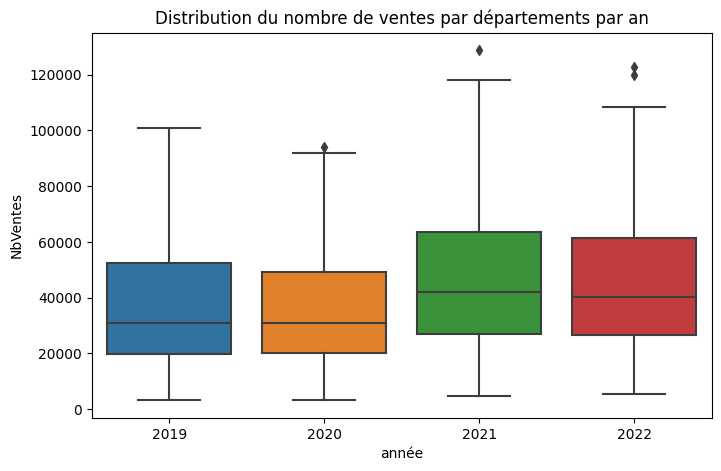

In [ ]:
#Visualisation du diagramme de boite à moustaches
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_ventes_ans_df, x="year", y="NbVentes")
plt.title("Distribution du nombre de ventes par départements par an")
plt.xlabel("année")
plt.ylabel("NbVentes")
plt.show()

<h1>02. Distribution des Valeurs Foncières pour les "Maison" et "Appartement" (2019-2022)<h1>

In [ ]:
#Calcule de la somme, le maximum, le minimum et la valeur moyenne de la valeur fonciere pour les types de local maison et appartement pour chaque année
minmaxavg_vf = SparkDVF.sql("""
    Select `Type local`,
    year,
    sum(cast (`Valeur fonciere` as float)) as totalvaleursfonciere,
    max(cast (`Valeur fonciere` as float)) as maxvaleursfonciere,
    min(cast (`Valeur fonciere` as float)) as minvaleursfonciere,
    avg(cast (`Valeur fonciere` as float)) as avgvaleursfonciere
    FROM (Select `Type local`,
     YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) as year,
     `Valeur fonciere`
     FROM GlobalDB
     WHERE `Type local` IN ('Maison','Appartement')) where
     Group by `Type local`, year
     order by year
""")
print("Tableau récapitulatif des diffrentes métriques des bien 'Maison' et 'Appartement' :")
minmaxavg_vf.show()

Tableau récapitulatif des diffrentes métriques des bien 'Maison' et 'Appartement' :
+-----------+----+--------------------+------------------+------------------+------------------+
| Type local|year|totalvaleursfonciere|maxvaleursfonciere|minvaleursfonciere|avgvaleursfonciere|
+-----------+----+--------------------+------------------+------------------+------------------+
|Appartement|2019|1.628899007611708...|           3.182E8|              0.15|2491738.0646327306|
|     Maison|2019|4.870511850371363...|           2.086E9|              0.15| 684962.0709235839|
|Appartement|2020|1.059811437045955...|            2.68E8|              0.15|1807423.0720163782|
|     Maison|2020|2.479964170685296...|      4.35244992E8|              0.15| 352241.6200344998|
|Appartement|2021|3.325432351854835E12|      2.20623264E8|              0.15| 4969800.026085943|
|     Maison|2021|6.832411336660385E11|      2.20623264E8|               0.5| 824650.5628891429|
|Appartement|2022|5.330347113940935E12|    

In [ ]:
autres_métriques= SparkDVF.sql("""select distinct year,
                      PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY ValeurFonciere) OVER (PARTITION BY year, `Type local`) as Quartile1,
                      PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY ValeurFonciere) OVER (PARTITION BY year, `Type local`) as Median,
                      PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY ValeurFonciere) OVER (PARTITION BY year, `Type local`) as Quartile3,
                      `Type local`
                      from
                      (Select `Type local`,YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) as year,cast (`Valeur fonciere` as float) as ValeurFonciere
                      FROM GlobalDB
                      WHERE `Type local`=='Maison' Or `Type local`=='Appartement')
                      group by year, ValeurFonciere ,`Type local`
                      order by year""")
print("Tableau récapitulatif d'autres métriques pour les biens 'Maison' et 'Appartement' :")
autres_métriques.show()

Tableau récapitulatif d'autres métriques pour les biens 'Maison' et 'Appartement' :
+----+--------------+-------------+-----------+-----------+
|year|     Quartile1|       Median|  Quartile3| Type local|
+----+--------------+-------------+-----------+-----------+
|2019|     143568.75|252673.953125|   438632.5|     Maison|
|2019|127068.4296875|     222942.0|420583.3125|Appartement|
|2020|      129680.0|     225600.0|   424780.0|Appartement|
|2020|      151400.5|     263195.0|   449857.5|     Maison|
|2021|      133924.0|     234069.0|   444390.0|Appartement|
|2021|      163232.5|     288490.0|   497681.0|     Maison|
|2022|      138140.0|     244826.0|   464407.0|Appartement|
|2022|      170938.0|     304318.0|   525877.5|     Maison|
+----+--------------+-------------+-----------+-----------+



In [ ]:
autres_métriques_df=autres_métriques.toPandas()

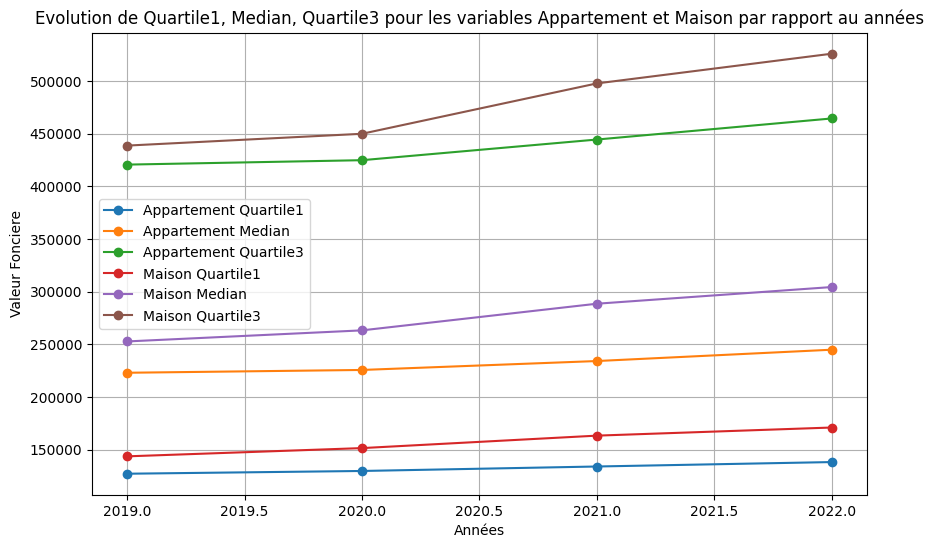

In [ ]:
appartement_data = autres_métriques_df[autres_métriques_df['Type local'] == 'Appartement']
maison_data = autres_métriques_df[autres_métriques_df['Type local'] == 'Maison']

plt.figure(figsize=(10, 6))

plt.plot(appartement_data['year'], appartement_data['Quartile1'], label='Appartement Quartile1', marker='o')
plt.plot(appartement_data['year'], appartement_data['Median'], label='Appartement Median', marker='o')
plt.plot(appartement_data['year'], appartement_data['Quartile3'], label='Appartement Quartile3', marker='o')

plt.plot(maison_data['year'], maison_data['Quartile1'], label='Maison Quartile1', marker='o')
plt.plot(maison_data['year'], maison_data['Median'], label='Maison Median', marker='o')
plt.plot(maison_data['year'], maison_data['Quartile3'], label='Maison Quartile3', marker='o')

plt.title('Evolution de Quartile1, Median, Quartile3 pour les variables Appartement et Maison par rapport au années')
plt.xlabel('Années')
plt.ylabel('Valeur Fonciere')
plt.legend()
plt.grid(True)
plt.show()

<h1>03. Distribution des Surfaces des "Maisons" (2019-2022)</h1>

In [ ]:
#Création d'un tableau qui contient toutes les code de departement et leurs nombre de ventes sur chaque année
distribution_surface_maison=SparkDVF.sql("""SELECT
    `Code departement`,
    SUM(`Surface reelle bati`) AS `Surface des maisons`,
    YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) AS year
FROM
    GlobalDB
WHERE `Type local`=='Maison'
group by  `Code departement`, year
  order by `Surface des maisons` desc"""
)

In [ ]:
distribution_surface_maison.show()

+----------------+-------------------+----+
|Code departement|Surface des maisons|year|
+----------------+-------------------+----+
|              59|          3449391.0|2021|
|              59|          3122538.0|2019|
|              59|          3069942.0|2022|
|              59|          3016408.0|2020|
|              33|          2606111.0|2021|
|              33|          2366581.0|2022|
|              83|          2343443.0|2021|
|              33|          2286428.0|2019|
|              33|          2192670.0|2020|
|              83|          2163597.0|2022|
|              62|          2132405.0|2021|
|              44|          2102082.0|2021|
|              62|          1983786.0|2022|
|              44|          1951964.0|2019|
|              77|          1926253.0|2021|
|              44|          1889041.0|2020|
|              62|          1882758.0|2020|
|              62|          1875974.0|2019|
|              44|          1825445.0|2022|
|              76|          1803

In [ ]:
#Conversion de notre tableau en format pandas en utilisant la fonction toPandas() de Spark
distribution_surface_maison_df= distribution_surface_maison.toPandas()

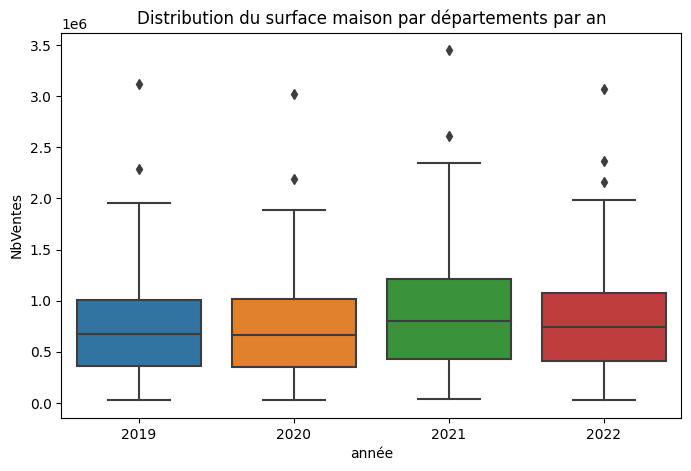

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=distribution_surface_maison_df, x="year", y="Surface des maisons")
plt.title("Distribution du surface maison par départements par an")
plt.xlabel("année")
plt.ylabel("NbVentes")
plt.show()

In [ ]:
#Generation d'un tableau qui contient la surface vendu par département pour les maisons
SparkDVF.sql("""Select `Code departement`,`Type local`,YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) as year, SUM(`Surface reelle bati`) as SurfaceVendu
                      FROM GlobalDB
                      WHERE `Type local`=='Maison'
                      Group BY year,`Type local`,`Code departement`""").show()

+----------------+----------+----+------------+
|Code departement|Type local|year|SurfaceVendu|
+----------------+----------+----+------------+
|              81|    Maison|2020|    668081.0|
|              59|    Maison|2019|   3122538.0|
|              39|    Maison|2020|    341241.0|
|              56|    Maison|2019|   1456980.0|
|              70|    Maison|2020|    333711.0|
|              33|    Maison|2019|   2286428.0|
|              76|    Maison|2020|   1632398.0|
|              48|    Maison|2020|     87509.0|
|              31|    Maison|2019|   1368373.0|
|              82|    Maison|2020|    470981.0|
|              66|    Maison|2019|    678585.0|
|              40|    Maison|2019|    771381.0|
|              41|    Maison|2019|    596999.0|
|              36|    Maison|2019|    339984.0|
|              61|    Maison|2019|    552674.0|
|              43|    Maison|2020|    318824.0|
|              64|    Maison|2020|    853480.0|
|              61|    Maison|2020|    62

In [ ]:
#Calcule de quartile1, median, quartile3 de surface vendu des maison pour les départements
maisons_metriques= SparkDVF.sql("""select distinct year,
                      PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY SurfaceVendu) OVER (PARTITION BY year, `Type local`) as Quartile1,
                      PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY SurfaceVendu) OVER (PARTITION BY year, `Type local`) as Median,
                      PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY SurfaceVendu) OVER (PARTITION BY year, `Type local`) as Quartile3,
                      `Type local`
                      from
                      (Select `Type local`,YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) as year, SUM(`Surface reelle bati`) as SurfaceVendu
                      FROM GlobalDB
                      WHERE `Type local`=='Maison'
                      Group BY year,`Type local`,`Code departement`)
                      group by year, SurfaceVendu ,`Type local`
                      order by year""")
print("Tableau récapitulatif d'autres métriques pour les biens 'Maison':")
maisons_metriques.show()

Tableau récapitulatif d'autres métriques pour les biens 'Maison':
+----+---------+--------+---------+----------+
|year|Quartile1|  Median|Quartile3|Type local|
+----+---------+--------+---------+----------+
|2019| 357030.0|678585.0|1004504.0|    Maison|
|2020| 351551.0|668081.0|1016223.0|    Maison|
|2021| 429800.0|804139.0|1212743.0|    Maison|
|2022| 411723.0|741440.0|1071439.0|    Maison|
+----+---------+--------+---------+----------+



<h1>04. Top 50 des Villes avec le Plus Grand Nombre de Ventes en 2021</h1>

In [ ]:
#Affichage de Top 50 des Villes en nombre de ventes en 2021
top50_ville=SparkDVF.sql("""
SELECT
    Commune,
    COUNT(*) as NbVentes
FROM
    TableDVF2021
GROUP BY
    Commune
ORDER BY
    NbVentes DESC
LIMIT 51
""")
top50_ville.show()

+----------------+--------+
|         Commune|NbVentes|
+----------------+--------+
|        TOULOUSE|   32440|
|            NICE|   23042|
|        BESANCON|   20395|
|     MONTPELLIER|   19107|
|          NANTES|   18579|
|        BORDEAUX|   15864|
|   SAINT-ETIENNE|   14811|
|           DIJON|   13654|
|           LILLE|   13626|
|          RENNES|   12902|
|LA SEYNE SUR MER|   12452|
|           NIMES|   11075|
|          ANGERS|   10792|
|        GRENOBLE|   10179|
|           REIMS|    9909|
|CLERMONT FERRAND|    9769|
|          TOULON|    9610|
| AIX EN PROVENCE|    9431|
|           BREST|    9390|
|          CANNES|    9380|
+----------------+--------+
only showing top 20 rows



In [ ]:
top50_df=top50_ville.toPandas()

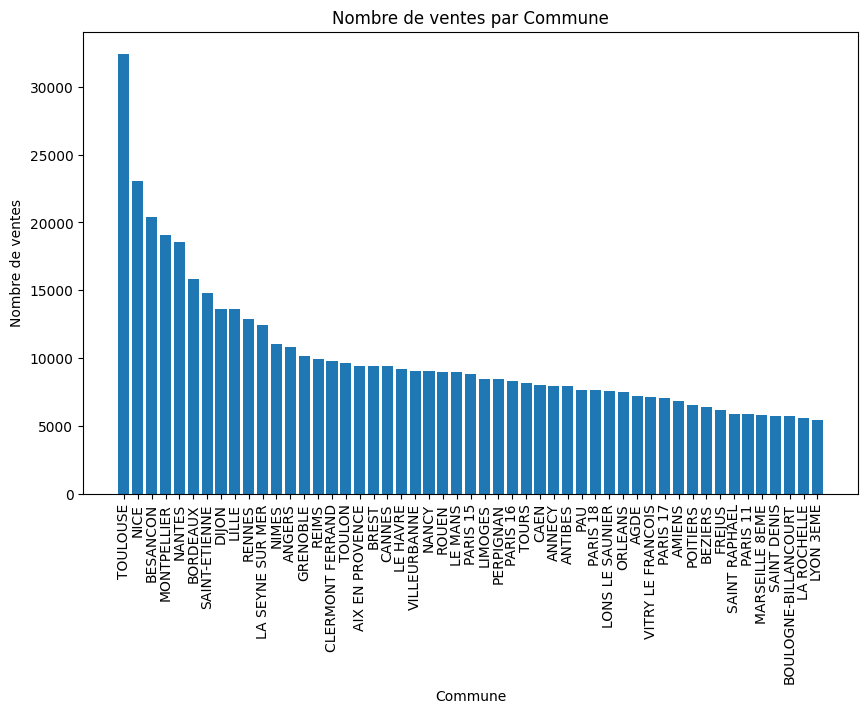

In [ ]:
#Visualisation de ces données en 2021:
plt.figure(figsize=(10,6))
plt.bar(top50_df['Commune'], top50_df['NbVentes'])
plt.xlabel('Commune')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par Commune en 2021')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

<h1>05. Évolution de la Surface Vendue de Type "Bois" (2019-2022)</h1>

In [ ]:
#Comparaison entre Surface reelle bati et Surface terrain de type bois pour chaque année
print("Nombre de surfaces terrain non nulle pour nature de culture Bois :")
SparkDVF.sql("""
SELECT
     count(*) as NbrVentes
FROM
     GlobalDB
WHERE
     `Nature culture` = "B" and `Surface terrain` >0
""").show()

print("Nombre de surfaces reelle bati non nulle pour nature de culture Bois :")
SparkDVF.sql("""
SELECT
     count(*) as NbrVentes
FROM
     GlobalDB
WHERE
     `Nature culture` = "B" and `Surface reelle bati` >0
""").show()

Nombre de surfaces terrain non nulle pour nature de culture Bois :
+---------+
|NbrVentes|
+---------+
|    54551|
+---------+

Nombre de surfaces reelle bati non nulle pour nature de culture Bois :
+---------+
|NbrVentes|
+---------+
|     2334|
+---------+



In [ ]:
#Surface Vendu pour chaque année
print("Programme surface bois 2019:")
SparkDVF.sql("""
SELECT
     SUM(`Surface terrain`)
FROM
     TableDVF2019
WHERE
     `Nature culture` = "B"
""").show()

print("Programme surface bois 2020:")

SparkDVF.sql("""
SELECT
     SUM(`Surface terrain`)
FROM
     TableDVF2020
WHERE
     `Nature culture` = "B"
""").show()

print("Programme surface bois 2021:")

SparkDVF.sql("""
SELECT
     SUM(`Surface terrain`)
FROM
     TableDVF2021
WHERE
     `Nature culture` = "B"
""").show()

print("Programme surface bois 2022:")

SparkDVF.sql("""
SELECT
     SUM(`Surface terrain`)
FROM
     TableDVF2022
WHERE
     `Nature culture` = "B"
""").show()

Programme surface bois 2019:
+--------------------+
|sum(Surface terrain)|
+--------------------+
|          7.985448E7|
+--------------------+

Programme surface bois 2020:
+--------------------+
|sum(Surface terrain)|
+--------------------+
|         6.8668245E7|
+--------------------+

Programme surface bois 2021:
+--------------------+
|sum(Surface terrain)|
+--------------------+
|         9.6400067E7|
+--------------------+

Programme surface bois 2022:
+--------------------+
|sum(Surface terrain)|
+--------------------+
|         8.3486207E7|
+--------------------+



In [ ]:
nature_bois=SparkDVF.sql("""SELECT SUM(`Surface terrain`) AS SurfaceVendu,
                YEAR(TO_DATE(`Date mutation`, 'dd/MM/yyyy')) AS year,
                `Nature culture`
                FROM GlobalDB
                WHERE `Nature culture` = "B"
                GROUP BY year,`Nature culture`
                ORDER BY year
            """)
nature_bois.show()

+------------+----+--------------+
|SurfaceVendu|year|Nature culture|
+------------+----+--------------+
|  7.985448E7|2019|             B|
| 6.8668245E7|2020|             B|
| 9.6400067E7|2021|             B|
| 8.3486207E7|2022|             B|
+------------+----+--------------+



In [ ]:
nature_bois_df=nature_bois.toPandas()

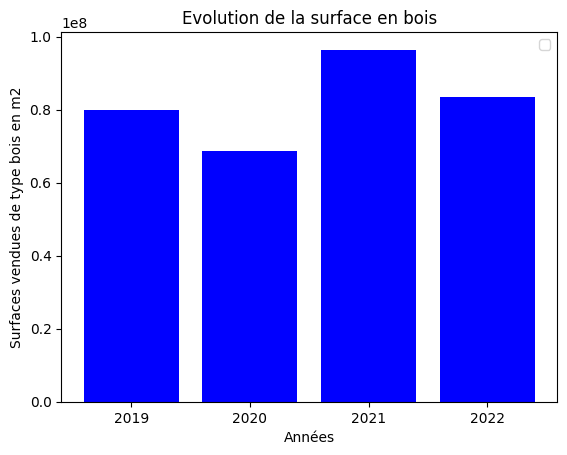

In [ ]:
#Visualisation de surface vendu de type bois
plt.bar(nature_bois_df['year'], nature_bois_df['SurfaceVendu'], color='blue')
plt.xlabel('Années')
plt.ylabel('Surfaces vendues de type Bois en m2')
plt.title('Evolution de la surface en Bois')
plt.legend()

plt.xticks(nature_bois_df['year'])

plt.show()
